Charger l'image.

(600, 440, 3)


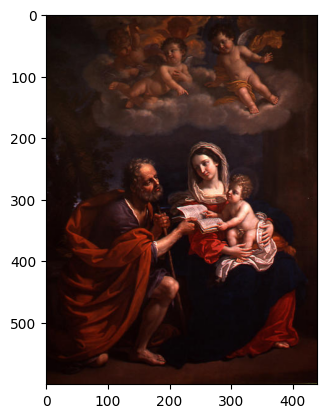

In [2]:
import skimage as ski
import matplotlib.pyplot as plt

image = ski.io.imread("data/famille.jpeg")

plt.imshow(image)
print(image.shape)

In [3]:
# test_image = ski.color.rgb2gray(image) > ski.filters.threshold_otsu(ski.color.rgb2gray(image))
# plt.imshow(test_image, cmap="gray")

In [4]:
# image = ski.color.rgb2gray(image)
# plt.imshow(image, cmap="gray")

In [5]:
# image = ski.exposure.equalize_adapthist(image)
# plt.imshow(image, cmap="gray")

In [6]:
# for _ in range(5):
#     image = ski.restoration.denoise_bilateral(image, sigma_color=0.1, sigma_spatial=2)
# plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

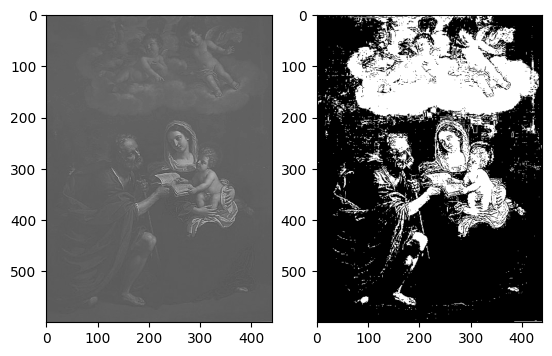

In [7]:
from fdog import difference_of_gaussians
import numpy as np

fig, axs = plt.subplots(1, 2)

low_sigma=0.28

dog_image = ski.color.rgb2gray(difference_of_gaussians(image, low_sigma, high_sigma=1.7*low_sigma, p=8.65))
axs[0].imshow(dog_image, cmap="gray")
thresh_image = dog_image > ski.filters.threshold_mean(dog_image)
axs[1].imshow(thresh_image, cmap="gray")

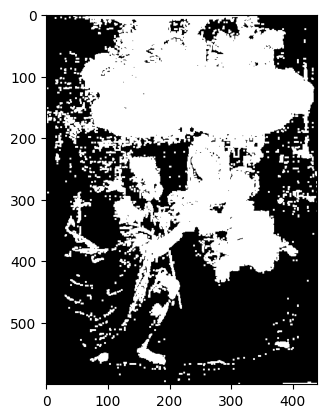

In [8]:
dilated_image = ski.morphology.dilation(thresh_image, footprint=np.ones((3,3)))
plt.imshow(dilated_image, cmap="gray")

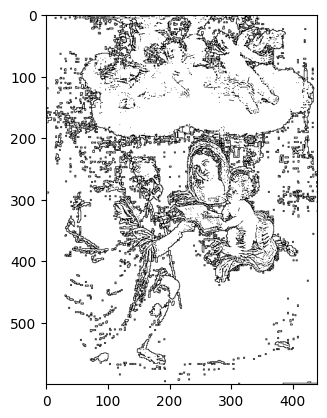

In [9]:
abs_diff = 1 - thresh_image ^ dilated_image
plt.imshow(abs_diff, cmap="gray")

In [10]:
abs_diff *= 255
abs_diff = abs_diff.astype(np.int8)

In [11]:
from subprocess import run
ski.io.imsave("family_edges.png", abs_diff)
run(["./skeletonize", "-i", "family_edges.png", "-o", "family_thinned_edges.png"])

/var/folders/5h/h0jn4xk900q9150sqrd1km640000gn/T/ipykernel_6396/2145115091.py:2: UserWarning: family_edges.png is a low contrast image
  ski.io.imsave("family_edges.png", abs_diff)


CompletedProcess(args=['./skeletonize', '-i', 'family_edges.png', '-o', 'family_thinned_edges.png'], returncode=0)

Regrouper les bords de l'image en composantes connexes.

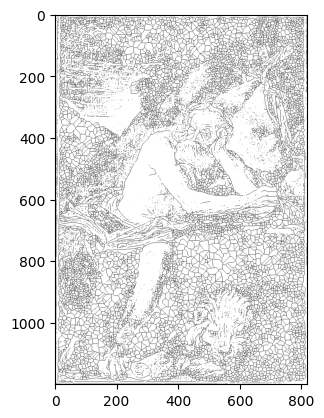

In [12]:
from edge_walker import group_edges
from utils import sort_edges


edge_image = ski.color.rgb2gray(ski.io.imread("data/psyche.png"))
plt.imshow(edge_image, cmap="gray")


In [13]:
edge_groups = sort_edges(group_edges(edge_image, min_edge_length=10, step=5))

137421
136875
136867
136863
136861
136852
136846
136838
136815
136810
136808
136800
136776
136768
136761
136759
136756
136754
136746
136740
136734
136730
136727
136722
136717
136715
136712
136708
136704
136698
136683
136678
136665
136662
136657
136654
136651
136644
136639
136638
136609
136603
136599
136595
136592
136588
136586
136566
136561
136528
136258
136253
136250
136243
136239
136233
136231
136230
136229
136228
136225
136220
136218
136215
136199
136193
136190
136185
136184
136183
136182
136181
136174
136138
136137
133486
133478
133458
133440
133421
133409
133402
133370
133365
133337
133336
133324
133313
133295
133277
133276
133258
133236
133235
133227
133217
133195
133172
133150
133139
133120
133097
133062
133047
133031
133009
132996
132979
132968
132959
132930
132924
132923
132866
132865
132856
132843
132816
132810
132786
132771
132753
132733
132730
132714
132713
132691
132687
132677
132666
132665
132644
132617
132616
132598
132549
132496
132480
132464
132463
132441
132440
132421

In [ ]:
print(len(edge_groups))

2124


<Axes: ylabel='Count'>

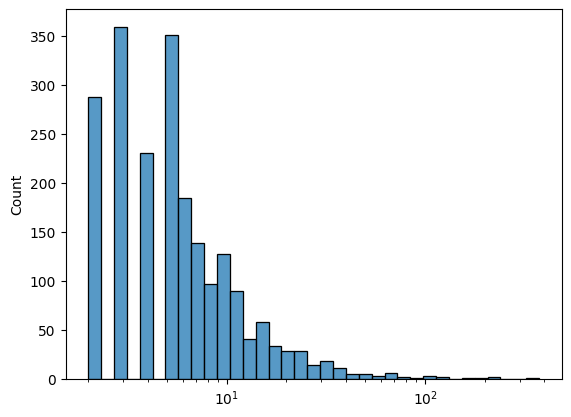

In [ ]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)
#hist = plt.hist(edge_group_lens)

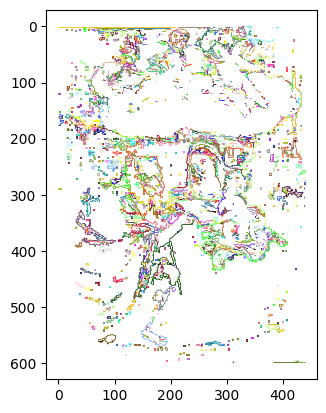

In [ ]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, edge_groups):
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

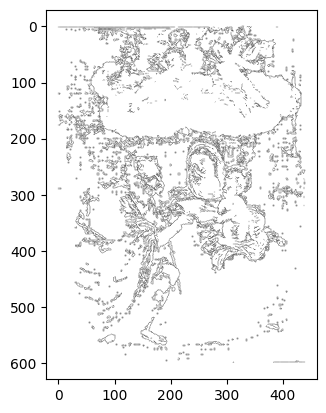

In [ ]:
plt.gca().invert_yaxis()
ids=0
for point_group in edge_groups:
    ids+=1
    preceding_point = point_group[0]
    for p in point_group:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.2)
        preceding_point = p.copy()


plt.gca().set_aspect("equal")

In [ ]:
import pickle

with open("psyche edges.pkl", "wb") as f:
    pickle.dump(edge_groups, f)
    f.close()